In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mb
import seaborn as sns
import scipy.stats 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
LData_url='D:/study/s7 files/UG Project Files/Project Code/Final_Year_Project/Data/final data/DATA_2.csv'
LData=pd.read_csv(LData_url)
LData.drop(['Unnamed: 0'],inplace=True,axis=1)
LData.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label,Label_no,FAULT TYPE
0,0.017268,1.412952,-1.357043,2.769995,0.281398,0.079185,0.196635,1.412952,0.281927,5.011757,1.433760,7.185659,4.159016,0.031073,9.014326,IR_7_2,0,INNER RACE FAULT OF 0.007 INCH
1,0.018069,1.584851,-1.358086,2.942937,0.282474,0.079792,0.193394,1.584851,0.283051,5.599162,1.463597,8.194916,4.614927,-0.071194,10.411133,IR_7_2,0,INNER RACE FAULT OF 0.007 INCH
2,0.018003,1.363093,-1.324916,2.688009,0.277097,0.076783,0.197085,1.363093,0.277682,4.908836,1.408944,6.916276,4.031559,-0.065819,8.552567,IR_7_2,0,INNER RACE FAULT OF 0.007 INCH
3,0.016062,1.204754,-1.366639,2.571393,0.291336,0.084877,0.199947,1.366639,0.291778,4.683827,1.459277,6.834998,3.899971,-0.136256,8.657523,IR_7_2,0,INNER RACE FAULT OF 0.007 INCH
4,0.014902,1.524770,-1.471156,2.995926,0.280108,0.078460,0.193867,1.524770,0.280504,5.435823,1.446891,7.865044,4.702297,-0.285466,9.985361,IR_7_2,0,INNER RACE FAULT OF 0.007 INCH


In [4]:
Data_modified=LData
del Data_modified['Label']
del Data_modified['FAULT TYPE']
Data_modified

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor,Label_no
0,0.017268,1.412952,-1.357043,2.769995,0.281398,0.079185,0.196635,1.412952,0.281927,5.011757,1.433760,7.185659,4.159016,0.031073,9.014326,0
1,0.018069,1.584851,-1.358086,2.942937,0.282474,0.079792,0.193394,1.584851,0.283051,5.599162,1.463597,8.194916,4.614927,-0.071194,10.411133,0
2,0.018003,1.363093,-1.324916,2.688009,0.277097,0.076783,0.197085,1.363093,0.277682,4.908836,1.408944,6.916276,4.031559,-0.065819,8.552567,0
3,0.016062,1.204754,-1.366639,2.571393,0.291336,0.084877,0.199947,1.366639,0.291778,4.683827,1.459277,6.834998,3.899971,-0.136256,8.657523,0
4,0.014902,1.524770,-1.471156,2.995926,0.280108,0.078460,0.193867,1.524770,0.280504,5.435823,1.446891,7.865044,4.702297,-0.285466,9.985361,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,0.011227,0.160425,-0.173777,0.334202,0.058572,0.003431,0.048321,0.173777,0.059639,2.913828,1.234225,3.596321,-0.235986,-0.142791,4.204036,9
2919,0.010400,0.194847,-0.165849,0.360696,0.059845,0.003581,0.049265,0.194847,0.060742,3.207799,1.232968,3.955113,-0.244767,-0.028598,4.624299,9
2920,0.010330,0.189214,-0.228017,0.417231,0.065553,0.004297,0.052928,0.228017,0.066362,3.435936,1.253814,4.308026,0.038159,-0.147712,5.077403,9
2921,0.011411,0.181495,-0.169396,0.350891,0.060620,0.003675,0.049961,0.181495,0.061684,2.942332,1.234649,3.632748,-0.259037,-0.094487,4.256589,9


In [5]:
scaler=StandardScaler()
scaler.fit(Data_modified.drop('Label_no',axis=1))
scaled_features=scaler.transform(Data_modified.drop('Label_no',axis=1))
scaled_features

array([[ 1.19796833, -0.14434151,  0.15749221, ...,  0.26649433,
         0.31412413,  0.18036255],
       [ 1.44632272, -0.03085589,  0.15680379, ...,  0.37375017,
        -0.22523813,  0.48556699],
       [ 1.42578833, -0.17725785,  0.17869555, ...,  0.23650906,
        -0.19688681,  0.07946773],
       ...,
       [-0.95294074, -0.95223791,  0.9026382 , ..., -0.70296439,
        -0.62879767, -0.67986044],
       [-0.61788058, -0.95733375,  0.94132741, ..., -0.77288179,
        -0.34808446, -0.85920952],
       [-0.18642364, -0.92221381,  0.92742132, ..., -0.63613941,
        -0.15362661, -0.64802142]])

In [6]:
scaled_df=pd.DataFrame(scaled_features,columns=Data_modified.columns[:-1])
scaled_df.head()

,Mean,Maximum_value,Minimum_value,Range,Standard Deviation,Variance,Absolute_mean,Absolute_MAX,RMS,Crest Factor,Shape factor,Impulse Factor,Kurtosis,Skewness,Clearance Factor
0,1.197968,-0.144342,0.157492,-0.151203,-0.271845,-0.451548,-0.254053,-0.167073,-0.271995,0.638615,0.064122,0.326553,0.266494,0.314124,0.180363
1,1.446323,-0.030856,0.156804,-0.094017,-0.268430,-0.449779,-0.269968,-0.056224,-0.268425,1.134384,0.199106,0.685482,0.373750,-0.225238,0.485567
2,1.425788,-0.177258,0.178696,-0.178313,-0.285496,-0.458554,-0.251844,-0.199224,-0.285484,0.551750,-0.048149,0.230750,0.236509,-0.196887,0.079468
3,0.824063,-0.281791,0.151159,-0.216875,-0.240304,-0.434947,-0.237786,-0.196937,-0.240702,0.361842,0.179560,0.201845,0.205552,-0.568380,0.102401
4,0.464385,-0.070521,0.082179,-0.076495,-0.275941,-0.453661,-0.267648,-0.094968,-0.276518,0.996526,0.123527,0.568167,0.394305,-1.355324,0.392535


In [7]:
X=scaled_df
Y=Data_modified['Label_no']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=750,stratify = Data_modified['Label_no'], random_state=132)


In [8]:
d_tree=DecisionTreeClassifier()

In [9]:
d_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [28]:
predictions=d_tree.predict(X_test)
training_predictions=d_tree.predict(X_train)

In [11]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.83      0.80      0.82        75
           2       0.96      0.97      0.97        76
           3       1.00      0.99      0.99        75
           4       0.72      0.68      0.70        75
           5       0.86      0.93      0.90        75
           6       0.73      0.73      0.73        75
           7       0.72      0.80      0.76        75
           8       0.76      0.69      0.73        75
           9       0.99      1.00      0.99        74

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



In [30]:
test_confusion_matrix=confusion_matrix(Y_test,predictions)
training_confusion_matrix=confusion_matrix(Y_train,training_predictions)
fault_type = ['IR_7_1','IR_14_1','IR_21_1','BL_7_1','BL_14_1','BL_21_1','OR_7_1','OR_14_1','OR_21_1','NORMAL']

Text(0.5, 1.0, 'Training Confusion Matrix')

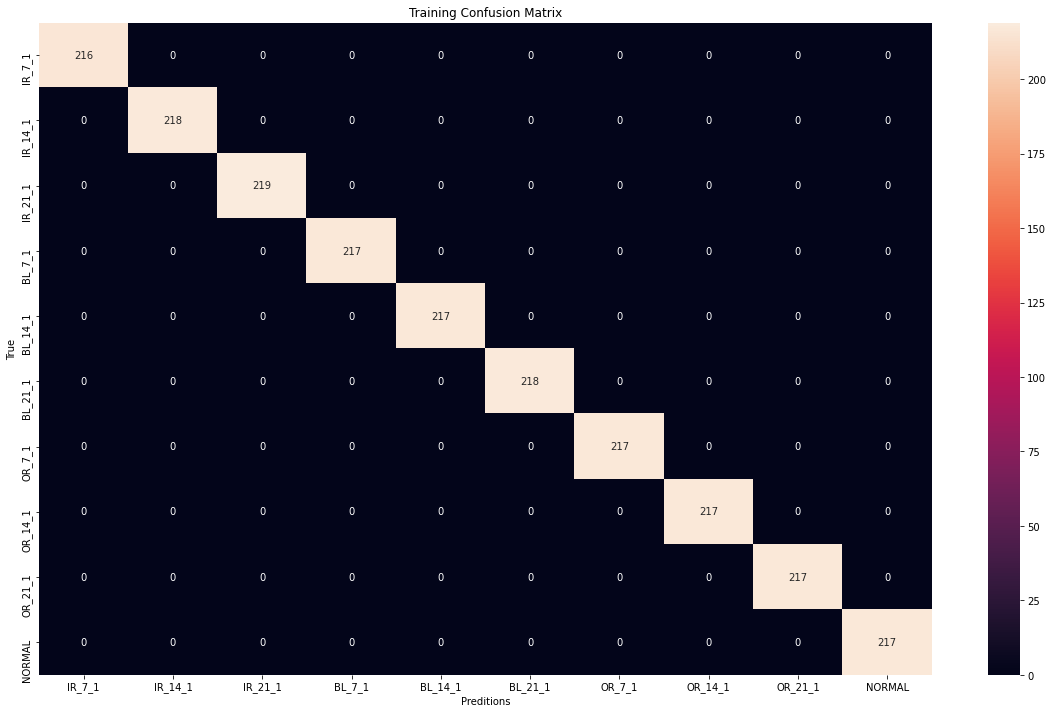

In [34]:
mb.figure(1,figsize=(20,12))
sns.heatmap(training_confusion_matrix,annot=True,xticklabels=fault_type,yticklabels=fault_type,fmt='d')
mb.xlabel('Preditions')
mb.ylabel('True')
mb.title('Training Confusion Matrix')

Text(0.5, 1.0, 'Test Confusion Matrix')

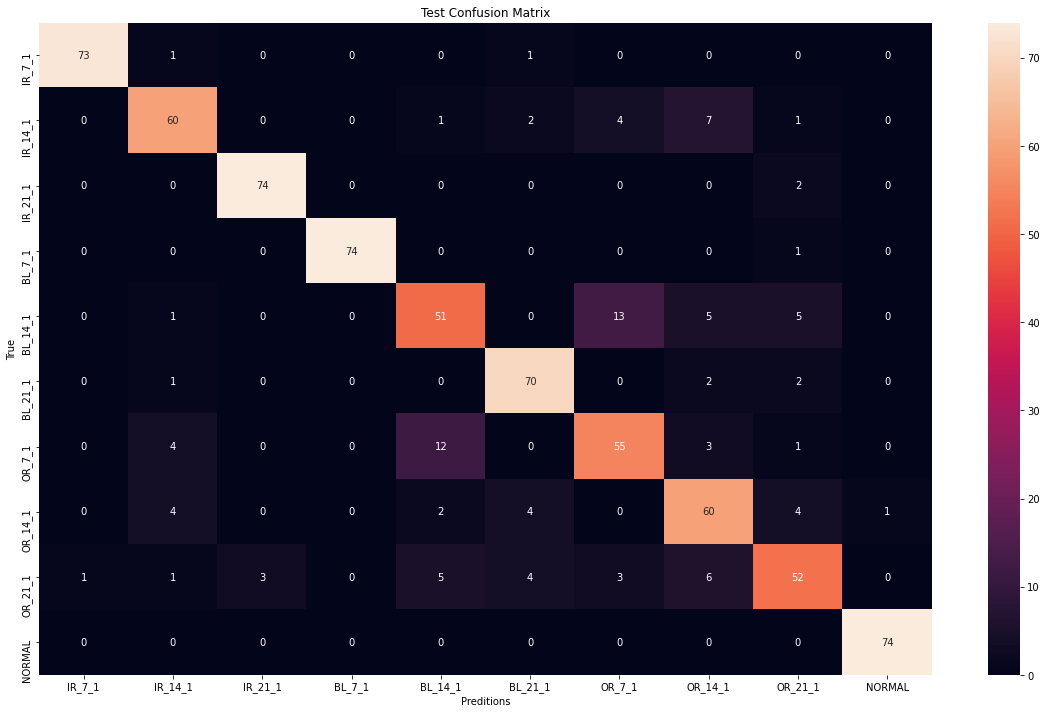

In [23]:
mb.figure(2,figsize=(20,12))
sns.heatmap(test_confusion_matrix,annot=True,xticklabels=fault_type,yticklabels=fault_type)
mb.xlabel('Preditions')
mb.ylabel('True')
mb.title('Test Confusion Matrix')


Text(0.5, 1.0, 'Test Confusion Matrix (%)')

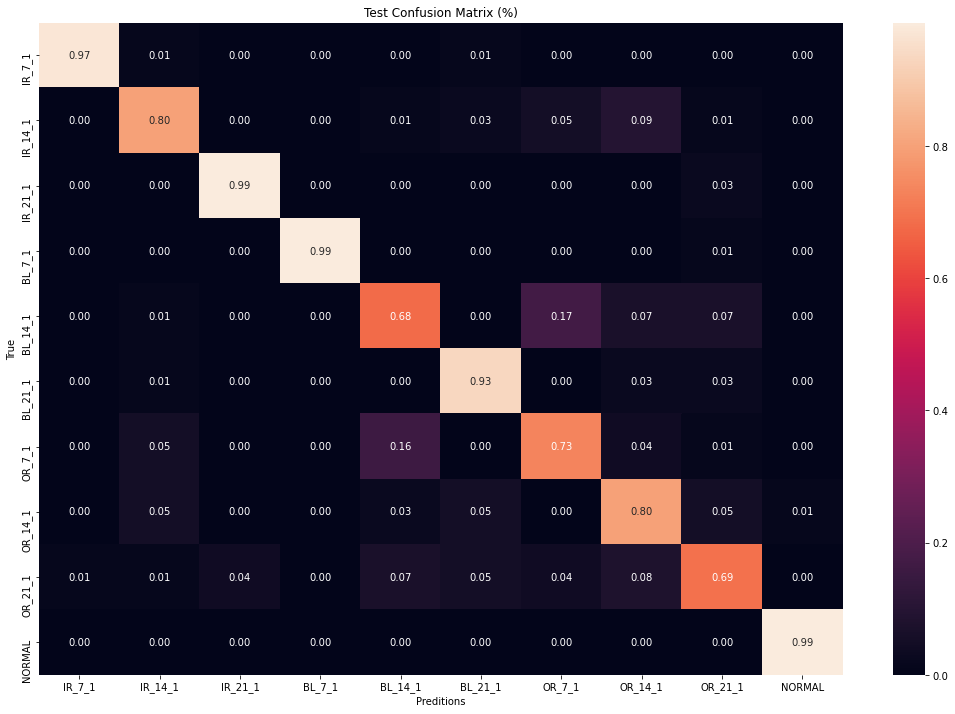

In [37]:
mb.figure(3,figsize=(18,12))
sns.heatmap(test_confusion_matrix/75,annot=True,xticklabels=fault_type,yticklabels=fault_type,fmt='.2f')
mb.xlabel('Preditions')
mb.ylabel('True')
mb.title('Test Confusion Matrix (%)')


